<a href="https://colab.research.google.com/github/chltjs1921/2024_modeling_practice/blob/main/240628Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
# Load the .mat file
mat_file = scipy.io.loadmat('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/ANN_model_v3.mat')

In [ ]:
# Print the keys (variable names) in the file
print("Variables in the .mat file:")
for key in mat_file.keys():
    if not key.startswith('__'):  # Skip metadata
        print(key)

        # Print information about each variable
        var = mat_file[key]
        print(f"  Type: {type(var)}")
        if isinstance(var, np.ndarray):
            print(f"  Shape: {var.shape}")
            print(f"  Data type: {var.dtype}")
        print()

Variables in the .mat file:
IW1_1
  Type: <class 'numpy.ndarray'>
  Shape: (10, 401)
  Data type: float64

LW2_1
  Type: <class 'numpy.ndarray'>
  Shape: (4, 10)
  Data type: float64

b1
  Type: <class 'numpy.ndarray'>
  Shape: (10, 1)
  Data type: float64

b2
  Type: <class 'numpy.ndarray'>
  Shape: (4, 1)
  Data type: float64

class
  Type: <class 'numpy.ndarray'>
  Shape: (4, 1)
  Data type: object

x1_step1_keep
  Type: <class 'numpy.ndarray'>
  Shape: (1, 401)
  Data type: uint16

x1_step1_remove
  Type: <class 'numpy.ndarray'>
  Shape: (1, 350)
  Data type: uint16

x1_step2_gain
  Type: <class 'numpy.ndarray'>
  Shape: (401, 1)
  Data type: uint8

x1_step2_xoffset
  Type: <class 'numpy.ndarray'>
  Shape: (401, 1)
  Data type: uint8

x1_step2_ymin
  Type: <class 'numpy.ndarray'>
  Shape: (1, 1)
  Data type: int16



In [ ]:
for key in mat_file.keys():
    print(key)

__header__
__version__
__globals__
IW1_1
LW2_1
b1
b2
class
x1_step1_keep
x1_step1_remove
x1_step2_gain
x1_step2_xoffset
x1_step2_ymin


In [ ]:
def analyze_matlab_model(file_path):
    # Load the .mat file
    mat_contents = scipy.io.loadmat(file_path)

    # Print all variables in the .mat file
    print("Variables in the .mat file:")
    for key in mat_contents.keys():
        if not key.startswith('__'):  # Skip metadata
            print(f"- {key}: {type(mat_contents[key])}")

    # Try to find the network structure
    if 'net' in mat_contents:
        net = mat_contents['net']
        if 'layers' in net.dtype.names:
            layers = net['layers'][0, 0]
            print(f"\nNumber of layers: {layers.shape[0]}")

            # Analyze the first few layers
            for i in range(min(5, layers.shape[0])):
                layer = layers[0, i]
                print(f"\nLayer {i + 1}:")
                for field in layer.dtype.names:
                    print(f"  {field}: {layer[field][0, 0]}")

                # Check for potential feature selection
                if 'weights' in layer.dtype.names:
                    weights = layer['weights'][0, 0]
                    if weights.size > 0:
                        weights = weights[0, 0]  # Usually, weights are stored in a nested array
                        if weights.ndim == 2:
                            kept_features = np.where(np.any(weights != 0, axis=0))[0]
                            removed_features = np.where(np.all(weights == 0, axis=0))[0]
                            print(f"  Potential feature selection detected:")
                            print(f"    Kept features: {len(kept_features)}")
                            print(f"    Removed features: {len(removed_features)}")
                            print(f"    Indices of removed features: {removed_features}")
    else:
        print("Network structure not found in expected format.")
        print("Please check the structure of your .mat file and modify the script accordingly.")

# Use the function
analyze_matlab_model('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/ANN_model_v3.mat')

Variables in the .mat file:
- IW1_1: <class 'numpy.ndarray'>
- LW2_1: <class 'numpy.ndarray'>
- b1: <class 'numpy.ndarray'>
- b2: <class 'numpy.ndarray'>
- class: <class 'numpy.ndarray'>
- x1_step1_keep: <class 'numpy.ndarray'>
- x1_step1_remove: <class 'numpy.ndarray'>
- x1_step2_gain: <class 'numpy.ndarray'>
- x1_step2_xoffset: <class 'numpy.ndarray'>
- x1_step2_ymin: <class 'numpy.ndarray'>
Network structure not found in expected format.
Please check the structure of your .mat file and modify the script accordingly.


In [ ]:
import scipy.io
import numpy as np

def analyze_matlab_file(file_path):
    # Load the .mat file
    mat_contents = scipy.io.loadmat(file_path)

    # Analyze feature removal
    keep = mat_contents.get('x1_step1_keep')
    remove = mat_contents.get('x1_step1_remove')

    if keep is not None and remove is not None:
        print("\nFeature removal analysis:")
        print(f"Shape of kept features (x1_step1_keep): {keep.shape}")
        print(f"Shape of removed features (x1_step1_remove): {remove.shape}")

        if keep.ndim == 2 and remove.ndim == 2:
            total_features = keep.shape[1] + remove.shape[1]
            print(f"Total number of original features: {total_features}")
            print(f"Number of kept features: {keep.shape[1]}")
            print(f"Number of removed features: {remove.shape[1]}")

            # Assuming the order of features is preserved
            removed_indices = np.arange(keep.shape[1], total_features)
            print(f"Indices of removed features: {removed_indices}")
    else:
        print("x1_step1_keep or x1_step1_remove not found in the file.")

    # Analyze network structure
    print("\nNetwork structure analysis:")
    for key in ['IW1_1', 'LW2_1', 'b1', 'b2']:
        if key in mat_contents:
            print(f"{key} shape: {mat_contents[key].shape}")

    # Analyze normalization parameters
    print("\nNormalization parameters:")
    for key in ['x1_step2_gain', 'x1_step2_xoffset', 'x1_step2_ymin']:
        if key in mat_contents:
            print(f"{key} shape: {mat_contents[key].shape}")

    # Analyze class information
    if 'class' in mat_contents:
        print("\nClass information:")
        print(f"Shape of class array: {mat_contents['class'].shape}")
        if mat_contents['class'].size < 10:  # If it's small enough to display
            print(f"Class values: {mat_contents['class']}")
        else:
            print(f"First few class values: {mat_contents['class'][:5]}")

# Use the function
analyze_matlab_file('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/ANN_model_v3.mat')


Feature removal analysis:
Shape of kept features (x1_step1_keep): (1, 401)
Shape of removed features (x1_step1_remove): (1, 350)
Total number of original features: 751
Number of kept features: 401
Number of removed features: 350
Indices of removed features: [401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418
 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436
 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454
 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472
 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490
 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508
 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526
 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544
 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562
 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580
 581 582 58

In [ ]:
import scipy.io
import numpy as np
import tensorflow as tf

def load_matlab_model(file_path):
    return scipy.io.loadmat(file_path)

def create_tensorflow_model(matlab_data):
    # Extract relevant data
    IW1_1 = matlab_data['IW1_1']
    LW2_1 = matlab_data['LW2_1']
    b1 = matlab_data['b1']
    b2 = matlab_data['b2']
    x1_step1_keep = matlab_data['x1_step1_keep']
    x1_step2_gain = matlab_data['x1_step2_gain']
    x1_step2_xoffset = matlab_data['x1_step2_xoffset']

    # Determine layer sizes
    input_size = x1_step1_keep.shape[1]
    hidden_size = IW1_1.shape[0]
    output_size = LW2_1.shape[0]

    # Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_size,)),
        tf.keras.layers.Lambda(lambda x: (x - x1_step2_xoffset) * x1_step2_gain),
        tf.keras.layers.Dense(hidden_size, activation='tansig',
                              kernel_initializer=tf.constant_initializer(IW1_1.T),
                              bias_initializer=tf.constant_initializer(b1.flatten())),
        tf.keras.layers.Dense(output_size, activation='linear',
                              kernel_initializer=tf.constant_initializer(LW2_1.T),
                              bias_initializer=tf.constant_initializer(b2.flatten()))
    ])

    return model

def tansig(x):
    return 2 / (1 + tf.exp(-2 * x)) - 1

# Custom activation function
tf.keras.utils.get_custom_objects().update({'tansig': tf.keras.layers.Activation(tansig)})

# Main execution
matlab_file_path = '/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/ANN_model_v3.mat'
matlab_data = load_matlab_model(matlab_file_path)
tf_model = create_tensorflow_model(matlab_data)

# Print model summary
tf_model.summary()

# Optional: Save the model
# tf_model.save('tensorflow_model.h5')

print("Model conversion complete. You can now use this TensorFlow model.")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (401, 401)                0         
                                                                 
 dense (Dense)               (401, 10)                 4020      
                                                                 
 dense_1 (Dense)             (401, 4)                  44        
                                                                 
Total params: 4064 (15.88 KB)
Trainable params: 4064 (15.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model conversion complete. You can now use this TensorFlow model.


In [ ]:
def analyze_matlab_file(file_path):
    # Load the .mat file
    mat_contents = scipy.io.loadmat(file_path)

    print("Analyzing MATLAB file for activation function clues...")

    # Check for direct activation function indicators
    activation_indicators = ['tansig', 'logsig', 'purelin', 'relu', 'softmax']
    for key in mat_contents.keys():
        if any(indicator in key.lower() for indicator in activation_indicators):
            print(f"Possible activation function indicator found: {key}")

    # Analyze weights
    if 'IW1_1' in mat_contents and 'LW2_1' in mat_contents:
        IW1_1 = mat_contents['IW1_1']
        LW2_1 = mat_contents['LW2_1']

        print("\nWeight analysis:")
        print(f"Hidden layer weights range: {np.min(IW1_1)} to {np.max(IW1_1)}")
        print(f"Output layer weights range: {np.min(LW2_1)} to {np.max(LW2_1)}")

        # Rough heuristic for activation function guess
        if np.max(np.abs(IW1_1)) > 5:
            print("Hidden layer might use a linear or ReLU activation (large weights)")
        elif np.max(np.abs(IW1_1)) < 2:
            print("Hidden layer might use sigmoid or tanh activation (smaller weights)")
        print(np.max(np.abs(IW1_1)))
        print(np.max(np.abs(LW2_1)))

    # Check for bias terms
    if 'b1' in mat_contents and 'b2' in mat_contents:
        b1 = mat_contents['b1']
        b2 = mat_contents['b2']

        print("\nBias analysis:")
        print(f"Hidden layer bias range: {np.min(b1)} to {np.max(b1)}")
        print(f"Output layer bias range: {np.min(b2)} to {np.max(b2)}")

    # Look for any strings that might indicate activation functions
    for key, value in mat_contents.items():
        if isinstance(value, np.ndarray) and value.dtype.kind in ['S', 'U']:  # Check for string arrays
            string_values = value.astype(str)
            for activation in activation_indicators:
                if activation in string_values:
                    print(f"\nPossible activation function '{activation}' found in variable '{key}'")

    print("\nNote: This analysis provides clues but cannot definitively determine the activation functions.")
    print("Please cross-reference with your MATLAB code or network creation parameters for confirmation.")

# Use the function
analyze_matlab_file('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/ANN_model_v3.mat')

Analyzing MATLAB file for activation function clues...

Weight analysis:
Hidden layer weights range: -0.7407768534438046 to 0.5941268603454032
Output layer weights range: -2.1029602881645393 to 2.3616337404401864
Hidden layer might use sigmoid or tanh activation (smaller weights)
0.7407768534438046
2.3616337404401864

Bias analysis:
Hidden layer bias range: -1.4146785106192759 to 1.0792683010233133
Output layer bias range: -0.3351403400713346 to 0.6949245208577028

Note: This analysis provides clues but cannot definitively determine the activation functions.
Please cross-reference with your MATLAB code or network creation parameters for confirmation.


In [ ]:
def load_matlab_model(file_path):
    return scipy.io.loadmat(file_path)

def create_tensorflow_model(matlab_data):
    # Extract relevant data
    IW1_1 = matlab_data['IW1_1']
    LW2_1 = matlab_data['LW2_1']
    b1 = matlab_data['b1']
    b2 = matlab_data['b2']
    x1_step1_keep = matlab_data['x1_step1_keep']
    x1_step2_gain = matlab_data['x1_step2_gain']
    x1_step2_xoffset = matlab_data['x1_step2_xoffset']

    # Determine layer sizes
    input_size = x1_step1_keep.shape[1]
    hidden_size = IW1_1.shape[0]
    output_size = LW2_1.shape[0]

    # Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_size,)),
        tf.keras.layers.Lambda(lambda x: (x - x1_step2_xoffset) * x1_step2_gain),
        tf.keras.layers.Dense(hidden_size, activation='tanh',
                              kernel_initializer=tf.constant_initializer(IW1_1.T),
                              bias_initializer=tf.constant_initializer(b1.flatten())),
        tf.keras.layers.Dense(output_size, activation='linear',
                              kernel_initializer=tf.constant_initializer(LW2_1.T),
                              bias_initializer=tf.constant_initializer(b2.flatten()))
    ])


    return model

# Main execution
matlab_file_path = '/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/ANN_model_v3.mat'
matlab_data = load_matlab_model(matlab_file_path)
tf_model = create_tensorflow_model(matlab_data)

# Print model summary
tf_model.summary()

print("Model conversion complete. You can now use this TensorFlow model.")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (401, 401)                0         
                                                                 
 dense_2 (Dense)             (401, 10)                 4020      
                                                                 
 dense_3 (Dense)             (401, 4)                  44        
                                                                 
Total params: 4064 (15.88 KB)
Trainable params: 4064 (15.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model conversion complete. You can now use this TensorFlow model.


In [ ]:
tf_model.save('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/sida_tensorflow.h5')
tf_model.save('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/sida_tensorflow.keras')
#complie 아니함. fine-tuning 할 때 하기

In [ ]:
# MS/ MS 전처리를 위한 db 까보기

# Load the .mat file
mat_file = scipy.io.loadmat('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/EDD_DB_180112.mat')

# Print the keys (variable names) in the file
print("Variables in the .mat file:")
for key in mat_file.keys():
    if not key.startswith('__'):  # Skip metadata
        print(key)

# Function to print info about a variable
def print_var_info(name, var):
    print(f"\nVariable: {name}")
    print(f"Type: {type(var)}")
    print(f"Shape: {var.shape if hasattr(var, 'shape') else 'N/A'}")
    print(f"Data type: {var.dtype if hasattr(var, 'dtype') else 'N/A'}")

    # if isinstance(var, np.ndarray):
    #     print("First few elements:")
    #     print(var.flatten()[:5])  # Print first 5 elements

# Investigate each variable
for key, value in mat_file.items():
    if not key.startswith('__'):
        if key == 'EDD_DB':  # Skip metadata
            print_var_info(key, value)

Variables in the .mat file:
BMSlogo
EDD_DB

Variable: EDD_DB
Type: <class 'numpy.ndarray'>
Shape: (1, 1)
Data type: [('No', 'O'), ('CompoundName', 'O'), ('ExactMass', 'O'), ('Polarity', 'O'), ('ChemicalFormula', 'O'), ('ProductIon', 'O'), ('ChemicalStructure', 'O'), ('CollisionEnergy', 'O'), ('InstrumentType', 'O'), ('PrecursorMz', 'O')]


In [ ]:
import pandas as pd

def load_mat_file(file_path):
    return scipy.io.loadmat(file_path)

def print_variable_names(mat_file):
    print("Variables in the .mat file:")
    for key in mat_file.keys():
        if not key.startswith('__'):  # Skip metadata
            print(key)

def print_var_info(name, var):
    print(f"\nVariable: {name}")
    print(f"Type: {type(var)}")
    print(f"Shape: {var.shape if hasattr(var, 'shape') else 'N/A'}")
    print(f"Data type: {var.dtype if hasattr(var, 'dtype') else 'N/A'}")
    if name == 'EDD_DB':
        if isinstance(var, np.ndarray):
            # print("First few elements:")
            print("Some MS/MS :")
            # print(var.flatten()[0][1])
            # print(var.flatten()[0][1].shape)
            # print(var.flatten()[0][2])
            # print(var.flatten()[0][2].shape)
            print(var.flatten()[0][5][:5][0])
            print(var.flatten()[0][5].shape)
            # print(var.flatten())  # Print first 5 elements

def inspect_values(mat_file):


    # Investigate each variable
    for key, value in mat_file.items():
        if not key.startswith('__'):  # Skip metadata
            print_var_info(key, value)
            if key == 'EDD_DB':

                if isinstance(value, np.ndarray):
                    print("\nArray shape:", value.shape)
                    print(value.flatten()[0][5].shape)
                    print(value.flatten()[0][5].ndim)
                    # print(value.flatten()[0][1])
                    for i in range(value.flatten()[0][5].shape[0]):
                        df = pd.DataFrame()
                        df = pd.DataFrame(value.flatten()[0][5][i][0])
                        df = df.transpose()
                        new_header = df.iloc[0]  # Grab the first row for the header
                        df = df[1:]  # Take the data less the header row
                        new_header = new_header.astype(float)
                        df.columns = new_header  # Set the header row as the df header
                        print(df.head())
                        print(value.flatten()[0][1][i][0][0])
                        if '/' in value.flatten()[0][1][i][0][0]:
                            value.flatten()[0][1][i][0][0] = value.flatten()[0][1][i][0][0].replace('/', '_')
                        df.to_csv(f'/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS/{str(value.flatten()[0][1][i][0][0])}.csv')
                    # df = pd.DataFrame(value.flatten()[0][5][0][0]
                    # print("\nDataFrame representation:")
                    # print(df.head())
                    # print("\nBasic statistics:")
                    # print(df.describe())
                #     if value.ndim == 1 or value.ndim == 2:
                #         df = pd.DataFrame(value)
                #         print("\nDataFrame representation:")
                #         print(df.head())
                #         print("\nBasic statistics:")
                #         print(df.describe())
                #     else:
                #         print(f"\nArray is {value.ndim}-dimensional. Showing statistics for flattened array:")
                #         flat_df = pd.DataFrame(value.flatten())
                #         print(flat_df.describe())

                # print("\nDo you want to inspect this variable further? (y/n)")
                # if input().lower() == 'y':
                #     print("\nEnter a Python expression to evaluate on this variable (e.g., 'value.mean()' or 'value[0,0]'):")
                #     expr = input()
                #     try:
                #         result = eval(expr)
                #         print("Result:", result)
                #     except Exception as e:
                #         print(f"Error evaluating expression: {e}")

                # print("\nContinue to next variable? (y/n)")
                # if input().lower() != 'y':
                #     break

def main():
    file_path = input("Enter the path to your .mat file: ")
    mat_file = load_mat_file(file_path)
    print_variable_names(mat_file)
    inspect_values(mat_file)

if __name__ == "__main__":
    main()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

[1 rows x 61 columns]
10-METHYL-6-METHYLENE-5-TRIMETHYLSILYLMETHYL-9-UNDECEN-2-ONE
0  39.0   41.0   43.0   44.0   45.0   47.0   53.0   55.0   57.0   59.0   ...  \
1    1.7    3.3    2.3    1.7   11.6    1.3    2.0    2.7    5.9    8.4  ...   

0  154.0  155.0  157.0  158.0  169.0  183.0  197.0  198.0  211.0  226.0  
1    4.8    1.8    2.4    2.6    1.3    2.3    5.2    1.1    2.1    0.5  

[1 rows x 59 columns]
7-METHYL-6-TRIMETHYLSILYLMETHYL-7-OCTEN-3-ONE
0  39.0   41.0   43.0   44.0   45.0   53.0   55.0   58.0   59.0   67.0   ...  \
1    2.2    3.3   16.1    2.9   10.3    2.2    2.1    2.6    8.4    2.4  ...   

0  142.0  143.0  144.0  154.0  155.0  169.0  183.0  194.0  197.0  212.0  
1    2.5    4.4    4.3    9.8    2.2    3.6    1.8    1.6    5.1    0.6  

[1 rows x 41 columns]
6-METHYL-5-TRIMETHYLSILYLMETHYL-6-HEPTEN-2-ONE
0  91.0   115.0  126.0  141.0  165.0  178.0  179.0  189.0  191.0  192.0  ...  \
1    2.4    4.1    2.1    2.0    3.7    5.7

In [ ]:
#MSMS 폴더 안의 csv 재구성

df = pd.read_csv('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS/a-PBP.csv', index_col=0)
df.head()

,70.0651,72.0807,77.039,77.1183,79.0538,84.0812,84.1637,91.0536,91.0707,91.1672,...,110.0958,112.1134,112.2072,119.0845,129.0689,146.0601,147.0795,160.1107,189.1135,218.1526
1,16.51,7.68,23.45,1.64,1.32,25.92,1.89,100.0,49.18,1.99,...,1.38,49.65,4.92,4.9,1.51,1.09,5.8,1.68,5.0,3.36


In [ ]:
# 재구성한 model test. 논문과 같이 재현되는가

# MS/MS 전처리
import numpy as np

def estimate_noise_msms(intensities, mz_values, window_size=100):
    """
    Estimate noise level in an MS/MS spectrum using a sliding window approach.

    Parameters:
    intensities (array-like): Intensity values of the MS/MS spectrum
    mz_values (array-like): Corresponding m/z values
    window_size (float): Size of the sliding window in m/z units (default is 100)

    Returns:
    float: Estimated noise level
    """
    intensities = np.array(intensities)
    mz_values = np.array(mz_values)

    # Sort the arrays by m/z values
    sorted_indices = np.argsort(mz_values)
    sorted_intensities = intensities[sorted_indices]
    sorted_mz = mz_values[sorted_indices]

    noise_estimates = []

    # Slide the window across the spectrum
    start_mz = sorted_mz[0]
    end_mz = sorted_mz[-1]

    while start_mz < end_mz:
        window_end = start_mz + window_size

        # Get intensities within the current window
        window_intensities = sorted_intensities[(sorted_mz >= start_mz) & (sorted_mz < window_end)]

        if len(window_intensities) > 0:
            # Calculate noise as the median of the lower half of intensities in the window
            lower_half = window_intensities[window_intensities < np.median(window_intensities)]
            if len(lower_half) > 0:
                noise_estimates.append(np.median(lower_half))

        start_mz = window_end

    # Return the median of all noise estimates
    return np.median(noise_estimates) if noise_estimates else 0

# Example usage
mz_values = df.columns.astype(float)  # Example m/z range
intensities = df.iloc[0]  # Example intensities

estimated_noise = estimate_noise_msms(intensities, mz_values)
print(f"Estimated noise level: {estimated_noise:.2f}")

Estimated noise level: 2.51


In [ ]:
import numpy as np

def calculate_snr_and_filter(intensities, mz_values, snr_threshold=3, window_size=100):
    """
    Calculate S/N ratio for each intensity in an MS/MS spectrum and filter based on a threshold.

    Parameters:
    intensities (array-like): Intensity values of the MS/MS spectrum
    mz_values (array-like): Corresponding m/z values
    snr_threshold (float): S/N ratio threshold for filtering (default is 3)
    window_size (float): Size of the sliding window for noise estimation in m/z units (default is 100)

    Returns:
    tuple: (filtered_intensities, filtered_mz_values, snr_values)
    """
    intensities = np.array(intensities)
    mz_values = np.array(mz_values)

    # Estimate noise level
    noise_level = estimate_noise_msms(intensities, mz_values, window_size)

    # Calculate S/N ratio for each intensity
    snr_values = intensities / noise_level

    # Filter based on S/N ratio threshold
    mask = snr_values >= snr_threshold
    filtered_intensities = intensities[mask]
    filtered_mz_values = mz_values[mask]
    filtered_snr_values = snr_values[mask]

    return filtered_intensities, filtered_mz_values, filtered_snr_values

def reconstruct_binary_dataframe(filtered_mz):
    """
    Reconstruct a binary DataFrame using filtered m/z as column names.
    All intensity values are set to 1.

    Parameters:
    filtered_mz (array-like): Filtered m/z values to be used as column names

    Returns:
    pandas.DataFrame: Reconstructed binary DataFrame with integer m/z as column names and all values set to 1
    """
    # Round m/z values to integers and convert to strings
    column_names = [int(round(mz)) for mz in filtered_mz]

    # Create a DataFrame with one row, using filtered m/z as column names and all values set to 1
    df = pd.DataFrame([[1] * len(column_names)], columns=column_names)

    return df

# Example usage
mz_values = df.columns.astype(float)  # Example m/z range
intensities = df.iloc[0]  # Example intensities

filtered_intensities, filtered_mz, filtered_snr = calculate_snr_and_filter(intensities, mz_values)

# Filter the data
filtered_intensities, filtered_mz, _ = calculate_snr_and_filter(intensities, mz_values)

reconstructed_df = reconstruct_binary_dataframe(filtered_mz)

print(reconstructed_df)
print(f"\nDataFrame shape: {reconstructed_df.shape}")
print(f"\nColumn names: {list(reconstructed_df.columns)}")

   70   72   77   84   91   91   105  112
0    1    1    1    1    1    1    1    1

DataFrame shape: (1, 8)

Column names: [70, 72, 77, 84, 91, 91, 105, 112]


In [ ]:
df_full_barcode = pd.DataFrame(columns=list(range(50, 801)))
df_full_barcode.loc[0] = 0  # Assign 0 to all columns in the first row (index 0)
df_full_barcode.head()

,50,51,52,53,54,55,56,57,58,59,...,791,792,793,794,795,796,797,798,799,800
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def find_insertion_indices(df1, df2):
    df2.columns = df2.columns.astype(int)
    return [df1.columns.searchsorted(value) for value in df2.columns]

# Find insertion indices
indices = find_insertion_indices(df_full_barcode, reconstructed_df)

# Insert values from df2 into df1
for idx in indices:
    df_full_barcode.iloc[0, idx] = 1

print(df_full_barcode.sum().sum())

20
22
27
34
41
41
55
62
7


In [ ]:
import os
import glob
all_folder = glob.glob('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS/*') ## 또는 glob.glob('**')
all_file = [x for x in all_folder if os.path.isfile(x)]
for file_name in all_file:
    df = pd.read_csv(file_name, index_col=0)
    mz_values = df.columns.astype(float)  # Example m/z range
    intensities = df.iloc[0]  # Example intensities

    filtered_intensities, filtered_mz, filtered_snr = calculate_snr_and_filter(intensities, mz_values)

    # Filter the data
    filtered_intensities, filtered_mz, _ = calculate_snr_and_filter(intensities, mz_values)

    reconstructed_df = reconstruct_binary_dataframe(filtered_mz)

    df_full_barcode = pd.DataFrame(columns=list(range(50, 801)))
    df_full_barcode.loc[0] = 0

    # Find insertion indices
    indices = find_insertion_indices(df_full_barcode, reconstructed_df)

    # Insert values from df2 into df1
    for idx in set(indices):
       if idx < df_full_barcode.shape[1]:
            df_full_barcode.iloc[0, idx] = 1
       else:
            print(f"Warning: Index {idx} is out of bounds, skipping.")

    df_full_barcode.to_csv(f'/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_barcode/{os.path.basename(file_name)[:-4]}.csv')

<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
 

<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
 

<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: invalid value encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: invalid value encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: invalid value encountered in divide
  snr_values = intensities / noise_level
<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


<ipython-input-68-455f72b72300>:23: RuntimeWarning: divide by zero encountered in divide
  snr_values = intensities / noise_level


In [ ]:
!pip install tabula-py

In [ ]:
import tabula
import pandas as pd

def extract_tables_from_pdf(file_path):
    # Accepts file path as an argument
    tables = tabula.read_pdf(file_path, pages='all', multiple_tables=True)
    # Extract tables from PDF document using tabula library
    dataframes = []
    for table in tables:
        df = pd.DataFrame(table)
        dataframes.append(df)
    return dataframes

if __name__ == '__main__':
    dataframes = extract_tables_from_pdf('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/ac9b01643_si_001.pdf')
    for i, df in enumerate(dataframes):
        df.to_csv(f'/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/{i}.csv')



In [ ]:
import os
import glob
all_folder = glob.glob('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/*') ## 또는 glob.glob('**')
all_file = [x for x in all_folder if os.path.isfile(x)]


['/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/0.csv',
 '/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/1.csv',
 '/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/2.csv',
 '/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/3.csv',
 '/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/4.csv',
 '/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/5.csv',
 '/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/6.csv',
 '/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/7.csv']

In [ ]:
table1 = pd.read_csv('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/0.csv', index_col=0)
table1_cut = table1.iloc[:, :3]
table1_cut.columns

Index(['No', 'Class', 'Compound name'], dtype='object')

In [ ]:
table2 = pd.read_csv('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/1.csv', index_col=0, header=None)
table2.columns = table1.columns
table2.columns

Index(['No', 'Class', 'Compound name', 'Chemical formula', '[M]', '[M+H]+',
       '#(*)', 'X(**)', 'R1', 'R2'],
      dtype='object')

In [ ]:
for i in range(2,8):
    table_part = pd.read_csv(f'/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/{i}.csv', index_col=0, header=None)
    table_part_cut = table_part.iloc[:, :3]
    table_part_cut.columns = table1_cut.columns
    # print(table_part_cut.columns) # = table1.columns
    # print(table_part_cut.head())
    df_supple_dataset = pd.concat([df_supple_dataset, table_part_cut], axis=0)




(187, 10)

In [ ]:
df_supple_dataset = pd.concat([table1, table2], axis=0)
df_supple_dataset.shape

(44, 10)

In [ ]:
df_supple_dataset.to_csv('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/supple_dataset.csv')

In [ ]:
#class는 원핫 인코딩으로
import tensorflow as tf

# Convert 'Class' column to numerical type
df_supple_dataset['Class_Encoding'] = pd.factorize(df_supple_dataset['Class'])[0]

tf.one_hot(df_supple_dataset['Class_Encoding'], 4)

<tf.Tensor: shape=(187, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [ ]:
#MSMS 폴더에서 supple에 해당하는 애들만 뽑아서 dataset 만들기
import pandas as pd
import glob

df_supple_dataset = pd.read_csv('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_table/supple_dataset.csv')
df_supple = df_supple_dataset[['Compound name', 'Class_Encoding']]

In [ ]:
df_supple

,Compound name,Class_Encoding
0,Norneosildenafil,0
1,Sildenafil,0
2,Homosildenafil,0
3,Dimethylsildenafil,0
4,Cyclopentynafil,0
...,...,...
182,trans-Zeatin riboside,3
183,Triclocarban,3
184,Trinexapac-ethyl,3
185,Tyramine,3


In [ ]:
df_input_dataset = pd.read_excel('/content/drive/MyDrive/SIDA_transfer/new_test__input.xlsx', sheet_name='firstRM_overlap', header=1)
df_input_dataset.shape

(187, 757)

In [ ]:
df_input_dataset['Name'].sort_values().reset_index(drop=True)

0      (-)-Cotinine                             
1      1-(Methoxymethyl)-1H-benzotriazole       
2      1H-Benzotriazole, 4(or 5)-methyl-        
3      2',2'-Difluoro-2'-deoxyuridine           
4      2-Aminosulfonyl-benzoic acid methyl ester
                         ...                    
182    Xanthoanthrafil                          
183    Yohimbin                                 
184    cis-Cyclopentyltadalafil                 
185    ortho-Chlorophenylpiperazine             
186    trans-Zeatin riboside                    
Name: Name, Length: 187, dtype: object

In [ ]:
df_supple['Compound name'].sort_values().reset_index(drop=True)

0                            (-)-Cotinine
1      1-(Methoxymethyl)-1H-benzotriazole
2          2',2'-Difluoro-2'-deoxyuridine
3            2-Hydroxypropyl nortadalafil
4       4'-Hydroxy-5,7-dimethoxyflavanone
                      ...                
182                              Yohimbin
183              cis-Cyclopentyltadalafil
184              o-Chlorophenylpiperazine
185                  o-Toluenesulfonamide
186                 trans-Zeatin riboside
Name: Compound name, Length: 187, dtype: object

In [ ]:
df_input_dataset['Name'].sort_values().reset_index(drop=True) == df_supple['Compound name'].sort_values().reset_index(drop=True)

0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Length: 187, dtype: bool

In [ ]:
df_SNPS = pd.read_excel('/content/drive/MyDrive/SIDA_transfer/total_963.xlsx', sheet_name='Sheet1', header=None)
df_SNPS.head()

,0,1,2,3,4,5,6,7,8,9,...,744,745,746,747,748,749,750,751,752,753
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"1,4-dibenzylpiperazine_10eV.xlsx",Benzylpiperazine,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1-4(fluorobenzyl)piperazine_15eV.xlsx,Benzylpiperazine,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,mCPP_10eV.xlsx,Benzylpiperazine,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"1,4-dibenzylpiperazine_15eV.xlsx",Benzylpiperazine,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"1,4-dibenzylpiperazine_20eV.xlsx",Benzylpiperazine,1


In [ ]:
df_SNPS[df_SNPS[753] == 4].to_csv('/content/drive/MyDrive/SIDA_transfer/class4.csv')
df_SNPS[df_SNPS[753] == 5].to_csv('/content/drive/MyDrive/SIDA_transfer/class5.csv')
df_SNPS[df_SNPS[753] == 6].to_csv('/content/drive/MyDrive/SIDA_transfer/class6.csv')
df_SNPS[df_SNPS[753] == 8].to_csv('/content/drive/MyDrive/SIDA_transfer/class8.csv')
df_SNPS[df_SNPS[753] == 13].to_csv('/content/drive/MyDrive/SIDA_transfer/class13.csv')
print(df_SNPS[df_SNPS[753] == 4].shape)
print(df_SNPS[df_SNPS[753] == 5].shape)
print(df_SNPS[df_SNPS[753] == 6].shape)
print(df_SNPS[df_SNPS[753] == 8].shape)
print(df_SNPS[df_SNPS[753] == 13].shape)

(66, 754)
(63, 754)
(18, 754)
(12, 754)
(36, 754)


In [ ]:
df_SNPS[df_SNPS[753] == 9].to_csv('/content/drive/MyDrive/SIDA_transfer/class9.csv')
df_SNPS[df_SNPS[753] == 11].to_csv('/content/drive/MyDrive/SIDA_transfer/class11.csv')
print(df_SNPS[df_SNPS[753] == 9].shape)
print(df_SNPS[df_SNPS[753] == 11].shape)

(51, 754)
(72, 754)


In [ ]:
df_SIDA = pd.read_excel('/content/drive/MyDrive/SIDA_transfer/new_input_180223.xlsx', sheet_name='Input', header=1)
print(df_SIDA.shape)
df_SIDA.head()

(187, 758)


,Renumber,Number,Class(3),Class(4),Unnamed: 4,Name,m/z,50,51,52,...,791,792,793,794,795,796,797,798,799,800
0,1,1,2,2,EDD,Sildenafil,475.21215,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,2,EDD,Homosildenafil,489.22780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,2,2,EDD,Dimethylsildenafil,489.22780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,2,2,EDD,Cyclopentynafil,529.25910,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,2,2,EDD,Benzylsildenafil,551.24346,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_SIDA_barcode = df_SIDA.iloc[:,7:]

In [ ]:
df_SIDA_class = df_SIDA['Class(4)']

In [ ]:
df_SIDA_name = df_SIDA['Name']

In [ ]:
df_SIDA_edit = pd.concat([df_SIDA_name, df_SIDA_barcode, df_SIDA_class], axis=1)
df_SIDA_edit.to_csv('/content/drive/MyDrive/SIDA_transfer/SIDA_edit.csv')

In [ ]:
import os

df_supple_list = []
compound_name_list = []

all_folder = glob.glob('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_barcode/*') ## 또는 glob.glob('**')
all_file = [x for x in all_folder if os.path.isfile(x)]
for file_name in all_file:
    compound_name = file_name.split('/')[-1].split('.')[0]
    compound_name_list.append(compound_name)

for i in range(len(compound_name_list)):
    if compound_name_list[i] in list(df_supple['Compound name']):
        print(compound_name_list[i])
        #df_supple_list.append(pd.read_csv(f'/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/MSMS_barcode/{compound_name_list[i]}.csv'))

#df_supple_data = pd.concat(df_supple_list, axis=0)


Norneosildenafil
Homosildenafil
Sildenafil
Dimethylsildenafil


In [ ]:
X = df_SIDA_barcode.iloc[: , :401].astype(np.float32)
y = df_SIDA_class.astype(np.float32)

In [ ]:
X

,50,51,52,53,54,55,56,57,58,59,...,441,442,443,444,445,446,447,448,449,450
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
      ... 
182    3.0
183    3.0
184    1.0
185    1.0
186    1.0
Name: Class(4), Length: 187, dtype: float32

Epoch 1/100
6/6 [==============================] - 1s 5ms/step - loss: 0.9288 - accuracy: 0.7059
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8185 - accuracy: 0.7219
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7319 - accuracy: 0.7433
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.7807
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5804 - accuracy: 0.8075
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5224 - accuracy: 0.8182
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.8289
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4269 - accuracy: 0.8556
Epoch 9/100
6/6 [==============================] - 0s 7ms/step - loss: 0.3846 - accuracy: 0.8770
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.3523 - accuracy: 0.9037
Epoch 11/100
6/6 [===========

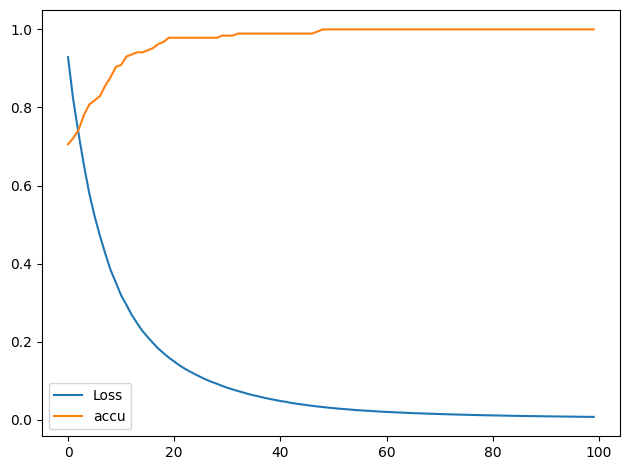

In [ ]:
# 1. Load the saved model

import scipy.io
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the .mat file
mat_data = scipy.io.loadmat('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/data/ANN_model_v3.mat')

# Extract the weights and biases
IW1_1 = mat_data['IW1_1']
LW2_1 = mat_data['LW2_1']
b1 = mat_data['b1']
b2 = mat_data['b2']

# Create the model
model = Sequential([
    Dense(IW1_1.shape[0], input_shape=(IW1_1.shape[1],), activation='tanh'),
    Dense(LW2_1.shape[0], activation='softmax')
])

# Set the weights
model.layers[0].set_weights([IW1_1.transpose(), b1.flatten()])
model.layers[1].set_weights([LW2_1.transpose(), b2.flatten()])

# # Define preprocessing function
# def preprocess(X):
#     # Implement preprocessing steps using x1_step1_keep, x1_step1_remove,
#     # x1_step2_gain, x1_step2_xoffset, x1_step2_ymin
#     # This is a placeholder and needs to be implemented based on MATLAB code
#     return X

# 2. Load data
# X = df_SIDA_barcode
y_encoded = to_categorical(y - 1)

# 1. Freeze all layers except the last one
# for layer in model.layers:
#     layer.trainable = False

# # 2. Modify the last layer to have 2 outputs with sigmoid activation
num_features = model.layers[-2].output_shape[-1]  # Get the number of features from the second-to-last layer
model.layers[-1] = tf.keras.layers.Dense(4, activation='linear', name='new_output_layer')

# Rebuild the model
x = model.layers[-2].output
output = model.layers[-1](x)
new_model = tf.keras.Model(inputs=model.input, outputs=output)

# 3. Configure the model for fine-tuning
new_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 4. test the model
history = new_model.fit(X, y_encoded, epochs=100) #50도 적당할 듯

# # # 5. Evaluate the fine-tuned model
# # test_loss, test_mae = model.evaluate(X_val_scaled, y_val)
# # print(f"Test MAE: {test_mae}")

# # # 6. Save the fine-tuned model
new_model.save('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/240717_SIDA_confirmed_epoch100.keras')

# 7. Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='accu')
plt.legend()

# plt.figure(figsize=(12, plt.subplot(1, 2, 1)))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['mae'], label='Training MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')
# plt.title('Training and Validation MAE')

plt.tight_layout()
plt.show()

#print("Fine-tuning complete. Model saved as 'fine_tuned_model.h5'")

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
df_SNPS_class11 = pd.read_csv('/content/drive/MyDrive/SIDA_transfer/class11.csv')
df_SNPS_class11

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,744,745,746,747,748,749,750,751,752,753
0,594,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4-F MDMB-butinaca_10eV.xlsx,Indazole carbonyl compound,11
1,595,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4-F MDMB-butinaca_20eV.xlsx,Indazole carbonyl compound,11
2,596,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5-Cl AB-PINACA_10eV_3.xlsx,Indazole carbonyl compound,11
3,597,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5-Cl AB-PINACA_15eV_1.xlsx,Indazole carbonyl compound,11
4,598,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5-F ADB metabolite2_10eV.xlsx,Indazole carbonyl compound,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,927,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,AB-PINACA_20eV.xlsx,Indazole carbonyl compound,11
68,928,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ADB-PINACA_15eV.xlsx,Indazole carbonyl compound,11
69,929,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,AKB48 N-pentanoic acid_15eV.xlsx,Indazole carbonyl compound,11
70,930,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,AMB-PINACA_20eV.xlsx,Indazole carbonyl compound,11


In [ ]:
df_SNPS_class11_barcode = df_SNPS_class11.iloc[:, 1:402]
df_SNPS_class11_class = df_SNPS_class11.iloc[:, -1]

In [ ]:
df_SNPS_class11_barcode

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_SIDA_barcode.iloc[: , :401]

,50,51,52,53,54,55,56,57,58,59,...,441,442,443,444,445,446,447,448,449,450
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_SNPS_class11_barcode.columns = df_SIDA_barcode.iloc[: , :401].columns
df_SNPS_class11_barcode

,50,51,52,53,54,55,56,57,58,59,...,441,442,443,444,445,446,447,448,449,450
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_with_class11 = pd.concat([df_SIDA_barcode.iloc[: , :401], df_SNPS_class11_barcode],axis=0, ignore_index=True)

In [ ]:
X_with_class11.shape

(259, 401)

In [ ]:
df_SIDA_class.name = 'Class'
df_SIDA_class

0      2
1      2
2      2
3      2
4      2
      ..
182    3
183    3
184    1
185    1
186    1
Name: Class, Length: 187, dtype: int64

In [ ]:
df_SNPS_class11_class.name = 'Class'
df_SNPS_class11_class = df_SNPS_class11_class.replace(11, 5)
df_SNPS_class11_class

0     5
1     5
2     5
3     5
4     5
     ..
67    5
68    5
69    5
70    5
71    5
Name: Class, Length: 72, dtype: int64

In [ ]:
y_with_class11 = pd.concat([df_SIDA_class, df_SNPS_class11_class],axis=0, ignore_index=True)
y_with_class11

0      2
1      2
2      2
3      2
4      2
      ..
254    5
255    5
256    5
257    5
258    5
Name: Class, Length: 259, dtype: int64

In [ ]:
X_with_class11 = X_with_class11.astype(np.float32)
y_with_class11 = y_with_class11.astype(np.float32)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/240717_SIDA_confirmed_epoch100.keras')

# Remove the last layer
new_model_remove = tf.keras.models.Model(inputs=new_model.inputs, outputs=new_model.layers[-2].output)

# Add a new last layer with 8 neurons
new_output = tf.keras.layers.Dense(5, activation='sigmoid')(new_model_remove.output)
new_model_with_class11 = tf.keras.models.Model(inputs=new_model_remove.inputs, outputs=new_output)

for layer in new_model_with_class11.layers[:-1]:
    layer.trainable = True

# Ensure the last layer is trainable
new_model_with_class11.layers[-1].trainable = True

y_encoded_with_class11 = to_categorical(y_with_class11 - 1)

# 3. Configure the model for fine-tuning
new_model_with_class11.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 4. test the model
# new_model.summary()
new_model_with_class11.summary()
#history = new_model_with_class8.fit(X_with_class8, y_encoded_with_class8, epochs=100) #50도 적당할 듯

Model: "model_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4_input (InputLayer)  [(None, 401)]             0         
                                                                 
 dense_4 (Dense)             (None, 10)                4020      
                                                                 
 dense_42 (Dense)            (None, 5)                 55        
                                                                 
Total params: 4075 (15.92 KB)
Trainable params: 4075 (15.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = new_model_with_class11.fit(X_with_class11, y_encoded_with_class11, epochs=100)
new_model_with_class11.save('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/240717_SIDA_confirmed_sigmoid_unfreeze_with_class11.keras')

Epoch 1/100
9/9 [==============================] - 1s 5ms/step - loss: 1.6487 - accuracy: 0.1351
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 1.5343 - accuracy: 0.2471
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 1.4351 - accuracy: 0.3514
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 1.3450 - accuracy: 0.4595
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 1.2605 - accuracy: 0.5367
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 1.1849 - accuracy: 0.5985
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 1.1139 - accuracy: 0.6409
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 1.0514 - accuracy: 0.6757
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.9904 - accuracy: 0.7104
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 0.9355 - accuracy: 0.7336
Epoch 11/100
9/9 [===========

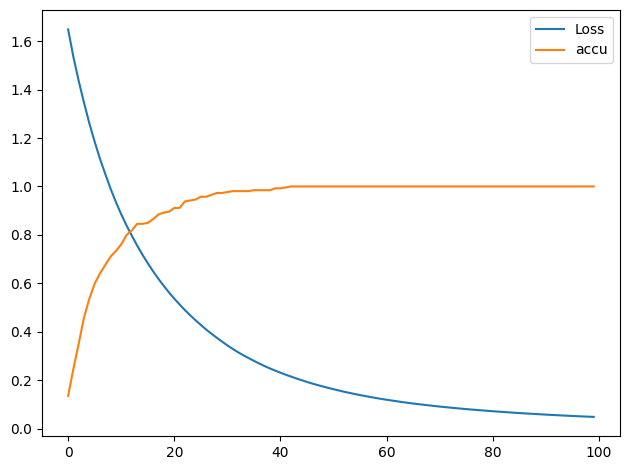

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='accu')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4_input (InputLayer)  [(None, 401)]             0         
                                                                 
 dense_4 (Dense)             (None, 10)                4020      
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
Total params: 4064 (15.88 KB)
Trainable params: 4064 (15.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
freeze_softmax_history = pd.DataFrame(data=[[12, 18, 36, 51, 63, 66, 72],[0.4810, 0.5248, 0.5454, 0.7078, 0.6619, 0.6704, 0.6760], [0.8543, 0.8732, 0.8027, 0.7185, 0.7200, 0.7312, 0.7143]], index=['Number of class data','Loss', 'Accuracy'], columns=['class8','class6', 'class13', 'class9', 'class5', 'class4', 'class11'])
freeze_softmax_history = freeze_softmax_history.transpose()
freeze_softmax_history.to_csv('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/freeze_softmax_history.csv')

In [ ]:
freeze_softmax_history

,Number of class data,Loss,Accuracy
class8,12.0,0.4810,0.8543
class6,18.0,0.5248,0.8732
class13,36.0,0.5454,0.8027
class9,51.0,0.7078,0.7185
class5,63.0,0.6619,0.7200
class4,66.0,0.6704,0.7312
class11,72.0,0.6760,0.7143


In [ ]:
freeze_sigmoid_history = pd.DataFrame(data=[[12, 18, 36, 51, 63, 66, 72],[0.4760, 0.5189, 0.7246, 0.6359, 0.7339, 0.7473, 0.6240], [0.8894, 0.8634, 0.7354, 0.7269, 0.6920, 0.6719, 0.7336]], index=['Number of class data','Loss', 'Accuracy'], columns=['class8','class6', 'class13', 'class9', 'class5', 'class4', 'class11'])
freeze_sigmoid_history = freeze_sigmoid_history.transpose()
freeze_sigmoid_history.to_csv('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/freeze_sigmoid_history.csv')

In [ ]:
unfreeze_softmax_history = pd.DataFrame(data=[[12, 18, 36, 51, 63, 66, 72],[0.0492, 0.0592, 0.0821, 0.0582, 0.1132, 0.1042, 0.0790], [1.0000, 1.0000, 1.0000, 1.0000, 0.9840, 0.9842, 1.0000]], index=['Number of class data','Loss', 'Accuracy'], columns=['class8','class6', 'class13', 'class9', 'class5', 'class4', 'class11'])
unfreeze_softmax_history = unfreeze_softmax_history.transpose()
unfreeze_softmax_history.to_csv('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/unfreeze_softmax_history.csv')

In [ ]:
unfreeze_sigmoid_history = pd.DataFrame(data=[[12, 18, 36, 51, 63, 66, 72],[0.0685, 0.0629, 0.0845, 0.0808, 0.0865, 0.0698, 0.0482], [1.0000, 1.0000, 1.0000, 1.0000, 0.9880, 0.9960, 1.0000]], index=['Number of class data','Loss', 'Accuracy'], columns=['class8','class6', 'class13', 'class9', 'class5', 'class4', 'class11'])
unfreeze_sigmoid_history = unfreeze_sigmoid_history.transpose()
unfreeze_sigmoid_history.to_csv('/content/drive/MyDrive/SIDA_transfer/AI-SIDA/unfreeze_sigmoid_history.csv')

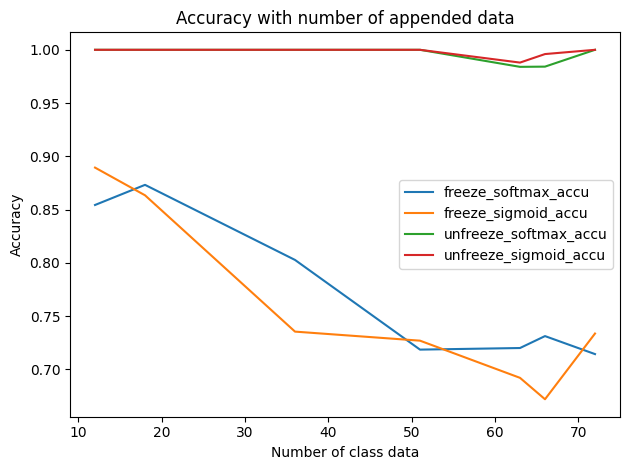

In [ ]:
#plt.plot(freeze_softmax_history['Number of class data'], freeze_softmax_history['Loss'], label='Loss')
plt.plot(freeze_softmax_history['Number of class data'], freeze_softmax_history['Accuracy'], label='freeze_softmax_accu')
plt.plot(freeze_sigmoid_history['Number of class data'], freeze_sigmoid_history['Accuracy'], label='freeze_sigmoid_accu')
plt.plot(unfreeze_softmax_history['Number of class data'], unfreeze_softmax_history['Accuracy'], label='unfreeze_softmax_accu')
plt.plot(unfreeze_sigmoid_history['Number of class data'], unfreeze_sigmoid_history['Accuracy'], label='unfreeze_sigmoid_accu')
plt.legend()
plt.title('Accuracy with number of appended data')
plt.xlabel('Number of class data')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

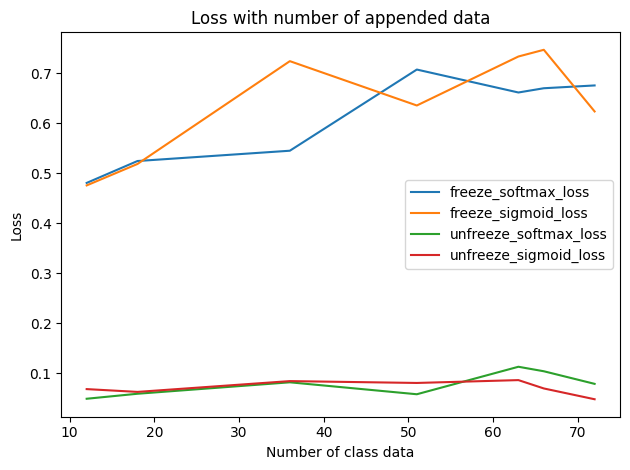

In [ ]:
plt.plot(freeze_softmax_history['Number of class data'], freeze_softmax_history['Loss'], label='freeze_softmax_loss')
plt.plot(freeze_sigmoid_history['Number of class data'], freeze_sigmoid_history['Loss'], label='freeze_sigmoid_loss')
plt.plot(unfreeze_softmax_history['Number of class data'], unfreeze_softmax_history['Loss'], label='unfreeze_softmax_loss')
plt.plot(unfreeze_sigmoid_history['Number of class data'], unfreeze_sigmoid_history['Loss'], label='unfreeze_sigmoid_loss')
plt.legend()
plt.title('Loss with number of appended data')
plt.xlabel('Number of class data')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

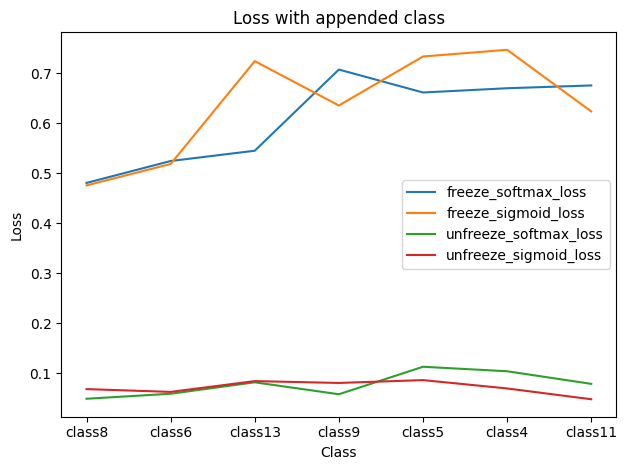

In [ ]:
plt.plot(freeze_softmax_history['Loss'], label='freeze_softmax_loss')
plt.plot(freeze_sigmoid_history['Loss'], label='freeze_sigmoid_loss')
plt.plot(unfreeze_softmax_history['Loss'], label='unfreeze_softmax_loss')
plt.plot(unfreeze_sigmoid_history['Loss'], label='unfreeze_sigmoid_loss')
plt.legend()
plt.title('Loss with appended class')
plt.xlabel('Class')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

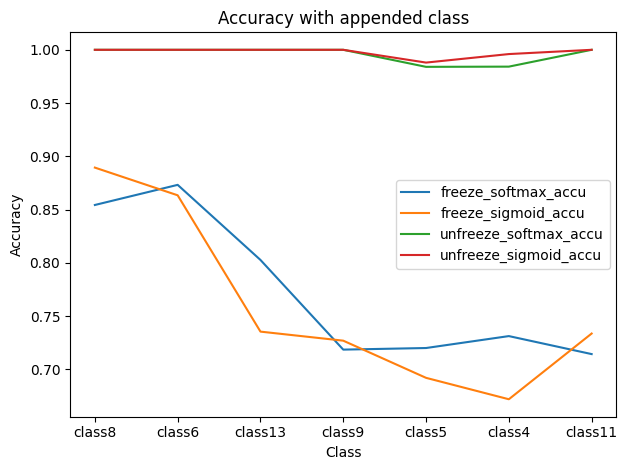

In [ ]:
plt.plot(freeze_softmax_history['Accuracy'], label='freeze_softmax_accu')
plt.plot(freeze_sigmoid_history['Accuracy'], label='freeze_sigmoid_accu')
plt.plot(unfreeze_softmax_history['Accuracy'], label='unfreeze_softmax_accu')
plt.plot(unfreeze_sigmoid_history['Accuracy'], label='unfreeze_sigmoid_accu')
plt.legend()
plt.title('Accuracy with appended class')
plt.xlabel('Class')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()